Les données ont été extraites et sauvegardées dans 'memoires_actuariat.txt'


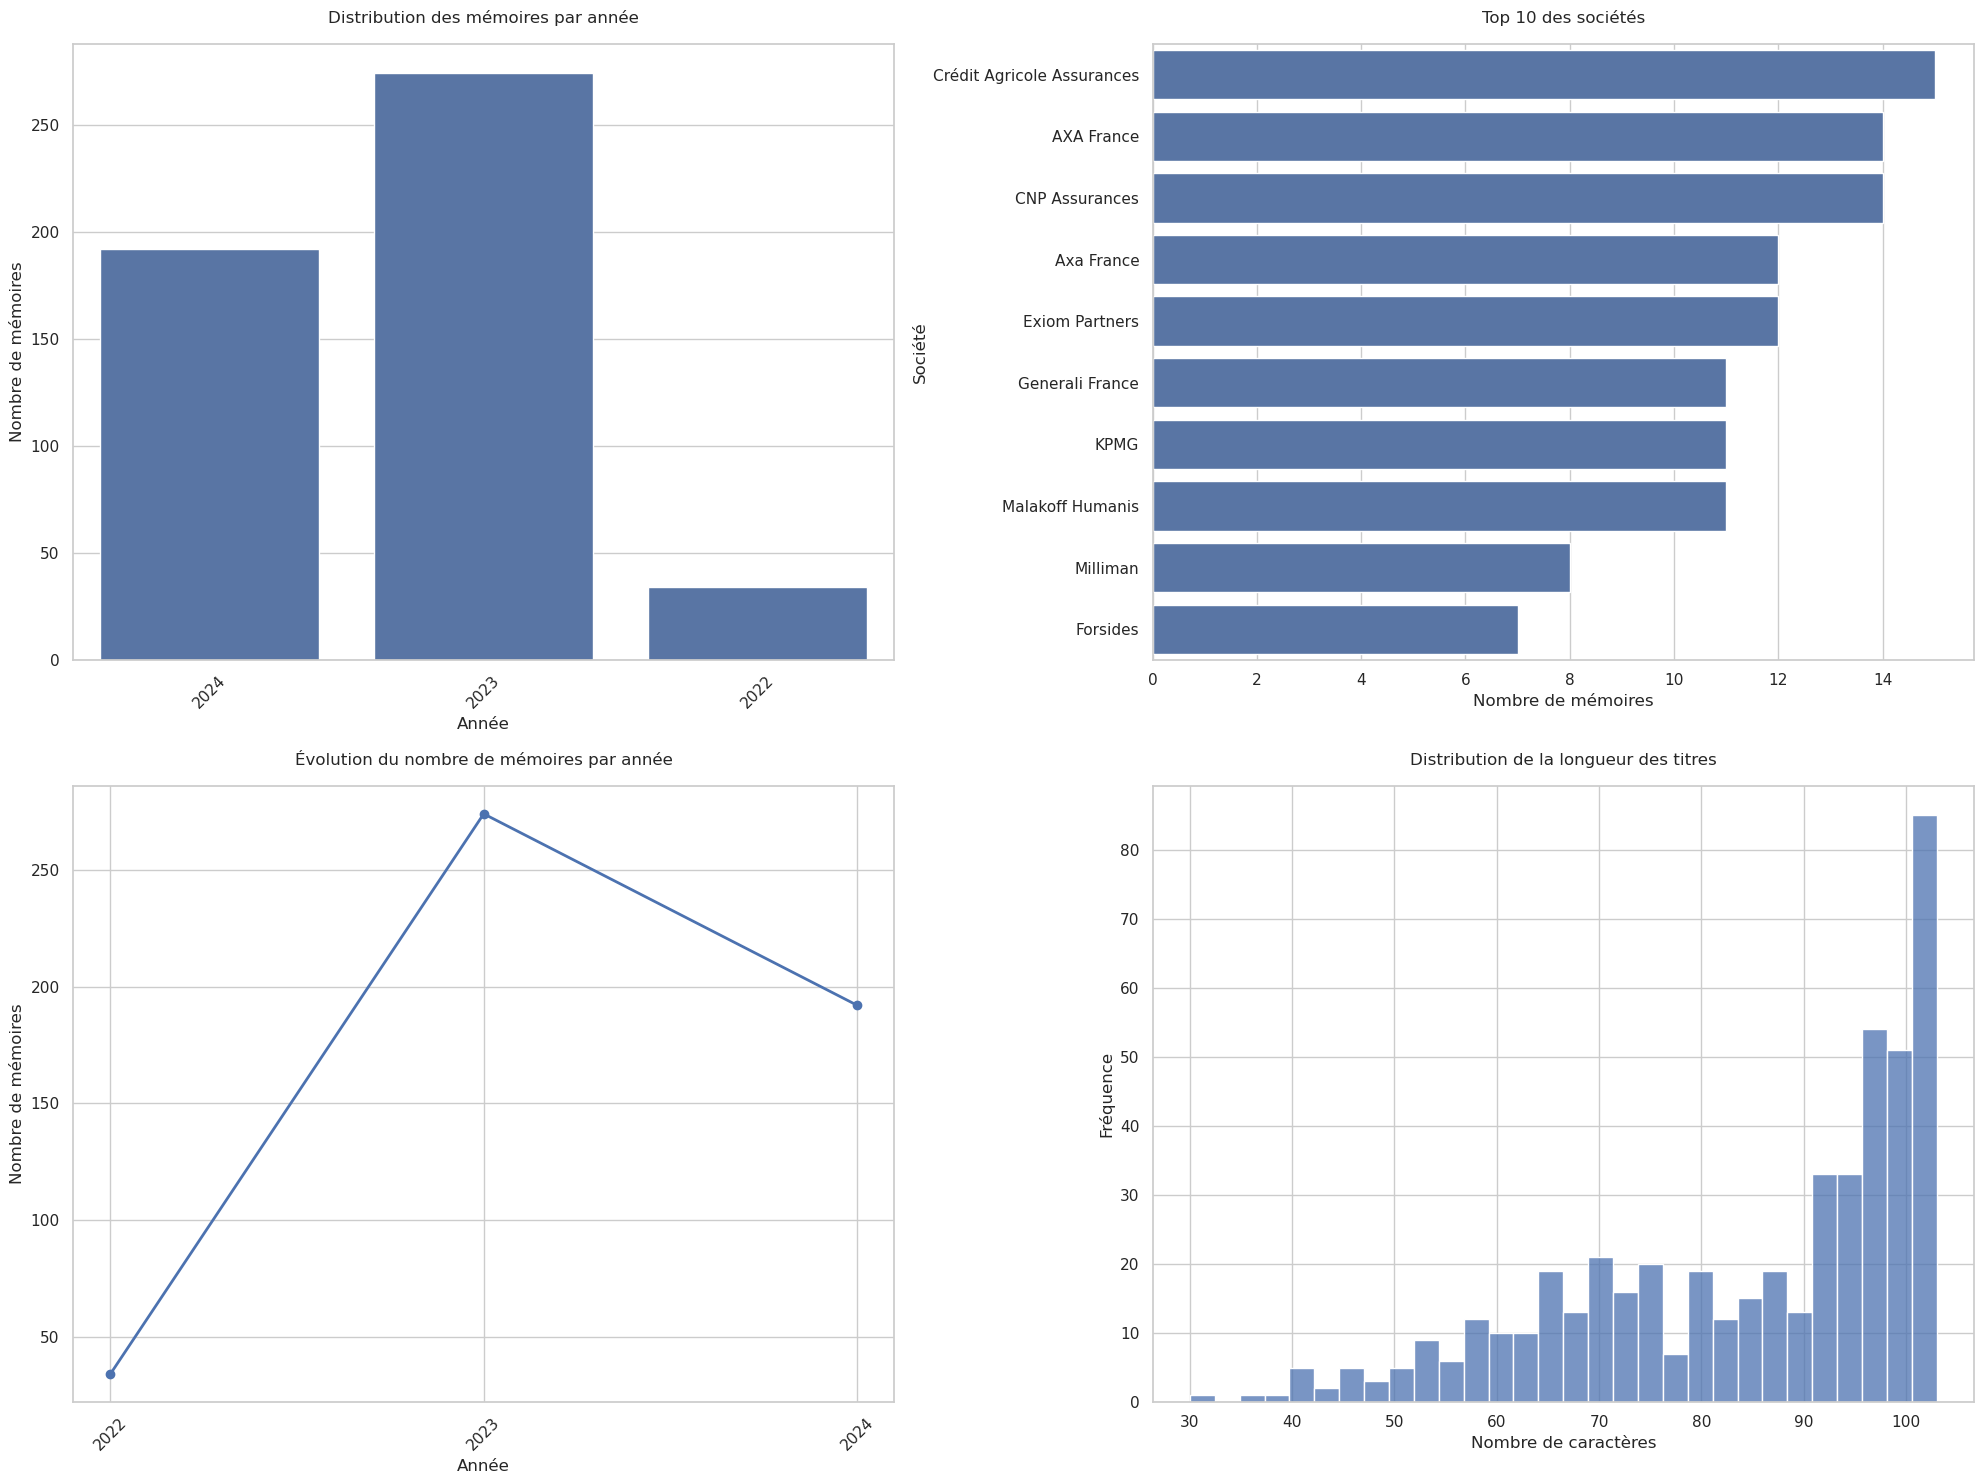


Statistiques sur les mémoires:
Nombre total de mémoires: 500

Nombre de mémoires par année:
Année
2022     34
2023    274
2024    192
Name: count, dtype: int64

Nombre de sociétés uniques: 230

Top 5 des sociétés:
Société
Crédit Agricole Assurances    15
AXA France                    14
CNP Assurances                14
Axa France                    12
Exiom Partners                12
Name: count, dtype: int64


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL de la page
url = "https://www.institutdesactuaires.com/se-documenter/memoires/memoires-d-actuariat-4651"

# Envoi de la requête HTTP
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)

# Création de l'objet BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Trouver le tableau
table = soup.find('table')

# Listes pour stocker les données
auteurs = []
societes = []
annees = []
titres = []

# Extraction des données du tableau
rows = table.find_all('tr')[1:]  # Skip header row
for row in rows:
    cols = row.find_all('td')
    if len(cols) >= 4:
        auteurs.append(cols[0].text.strip())
        societes.append(cols[1].text.strip())
        annees.append(cols[2].text.strip())
        titres.append(cols[3].text.strip())

# Création d'un DataFrame
df = pd.DataFrame({
    'Auteur': auteurs,
    'Société': societes,
    'Année': annees,
    'Titre': titres
})

# Sauvegarde dans un fichier txt
with open('memoires_actuariat.txt', 'w', encoding='utf-8') as f:
    df.to_string(f, index=False)

print("Les données ont été extraites et sauvegardées dans 'memoires_actuariat.txt'")

# Configuration de base
plt.figure(figsize=(20, 15))
sns.set_theme(style="whitegrid")

# 1. Distribution des mémoires par année
plt.subplot(2, 2, 1)
ax1 = sns.countplot(data=df, x='Année')
plt.title('Distribution des mémoires par année', pad=15, fontsize=12)
plt.xticks(rotation=45)
ax1.set_xlabel('Année')
ax1.set_ylabel('Nombre de mémoires')

# 2. Top 10 des sociétés les plus représentées
plt.subplot(2, 2, 2)
societe_counts = df['Société'].value_counts().head(10)
ax2 = sns.barplot(x=societe_counts.values, y=societe_counts.index)
plt.title('Top 10 des sociétés', pad=15, fontsize=12)
ax2.set_xlabel('Nombre de mémoires')
ax2.set_ylabel('Société')

# 3. Évolution du nombre de mémoires par année
plt.subplot(2, 2, 3)
yearly_counts = df['Année'].value_counts().sort_index()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2)
plt.title('Évolution du nombre de mémoires par année', pad=15, fontsize=12)
plt.xticks(rotation=45)
plt.xlabel('Année')
plt.ylabel('Nombre de mémoires')

# 4. Distribution des longueurs des titres
plt.subplot(2, 2, 4)
df['Longueur_titre'] = df['Titre'].str.len()
sns.histplot(data=df, x='Longueur_titre', bins=30)
plt.title('Distribution de la longueur des titres', pad=15, fontsize=12)
plt.xlabel('Nombre de caractères')
plt.ylabel('Fréquence')

# Ajustement de la mise en page
plt.tight_layout()
plt.show()

# Statistiques descriptives
print("\nStatistiques sur les mémoires:")
print(f"Nombre total de mémoires: {len(df)}")
print(f"\nNombre de mémoires par année:")
print(df['Année'].value_counts().sort_index())
print(f"\nNombre de sociétés uniques: {df['Société'].nunique()}")
print(f"\nTop 5 des sociétés:")
print(df['Société'].value_counts().head())
